# Regression Practice

## Import package

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

-----

## Load Data

사이킷런에 내장된 보스턴 주택 가격 데이터

- CRIM : 지역별 범죄 발생률  
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율  
- INDUS : 비상업 지역 넓이 비율  
- CHAS : 찰스강에 대한 더미 변수  
    - (강의 경계에 위치한 경우는 1, 아니면 0  
- NOX : 일산화질소 농도  
- RM : 방 개수  
- AGE : 1940년 이전에 건축된 소유 주택의 비율  
- DIS : 5개 주요 고용센터까지의 거리  
- RAD : 고속도로 접근 용이도 지수  
- TAX : 10,000 달러 당 재산세율  
- PTRAIO : town별 학생/교사 비율  
- B : town별 흑인의 비율  
- LSTAT : 하위계층 비율(%)  
- MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [126]:
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [127]:
boston = load_boston()

In [128]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [129]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [130]:
df_boston['PRICE'] = boston.target

In [131]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [132]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


=> non-null, all data is float types

-----

## EDA

#### seaborn - regplot() : X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌

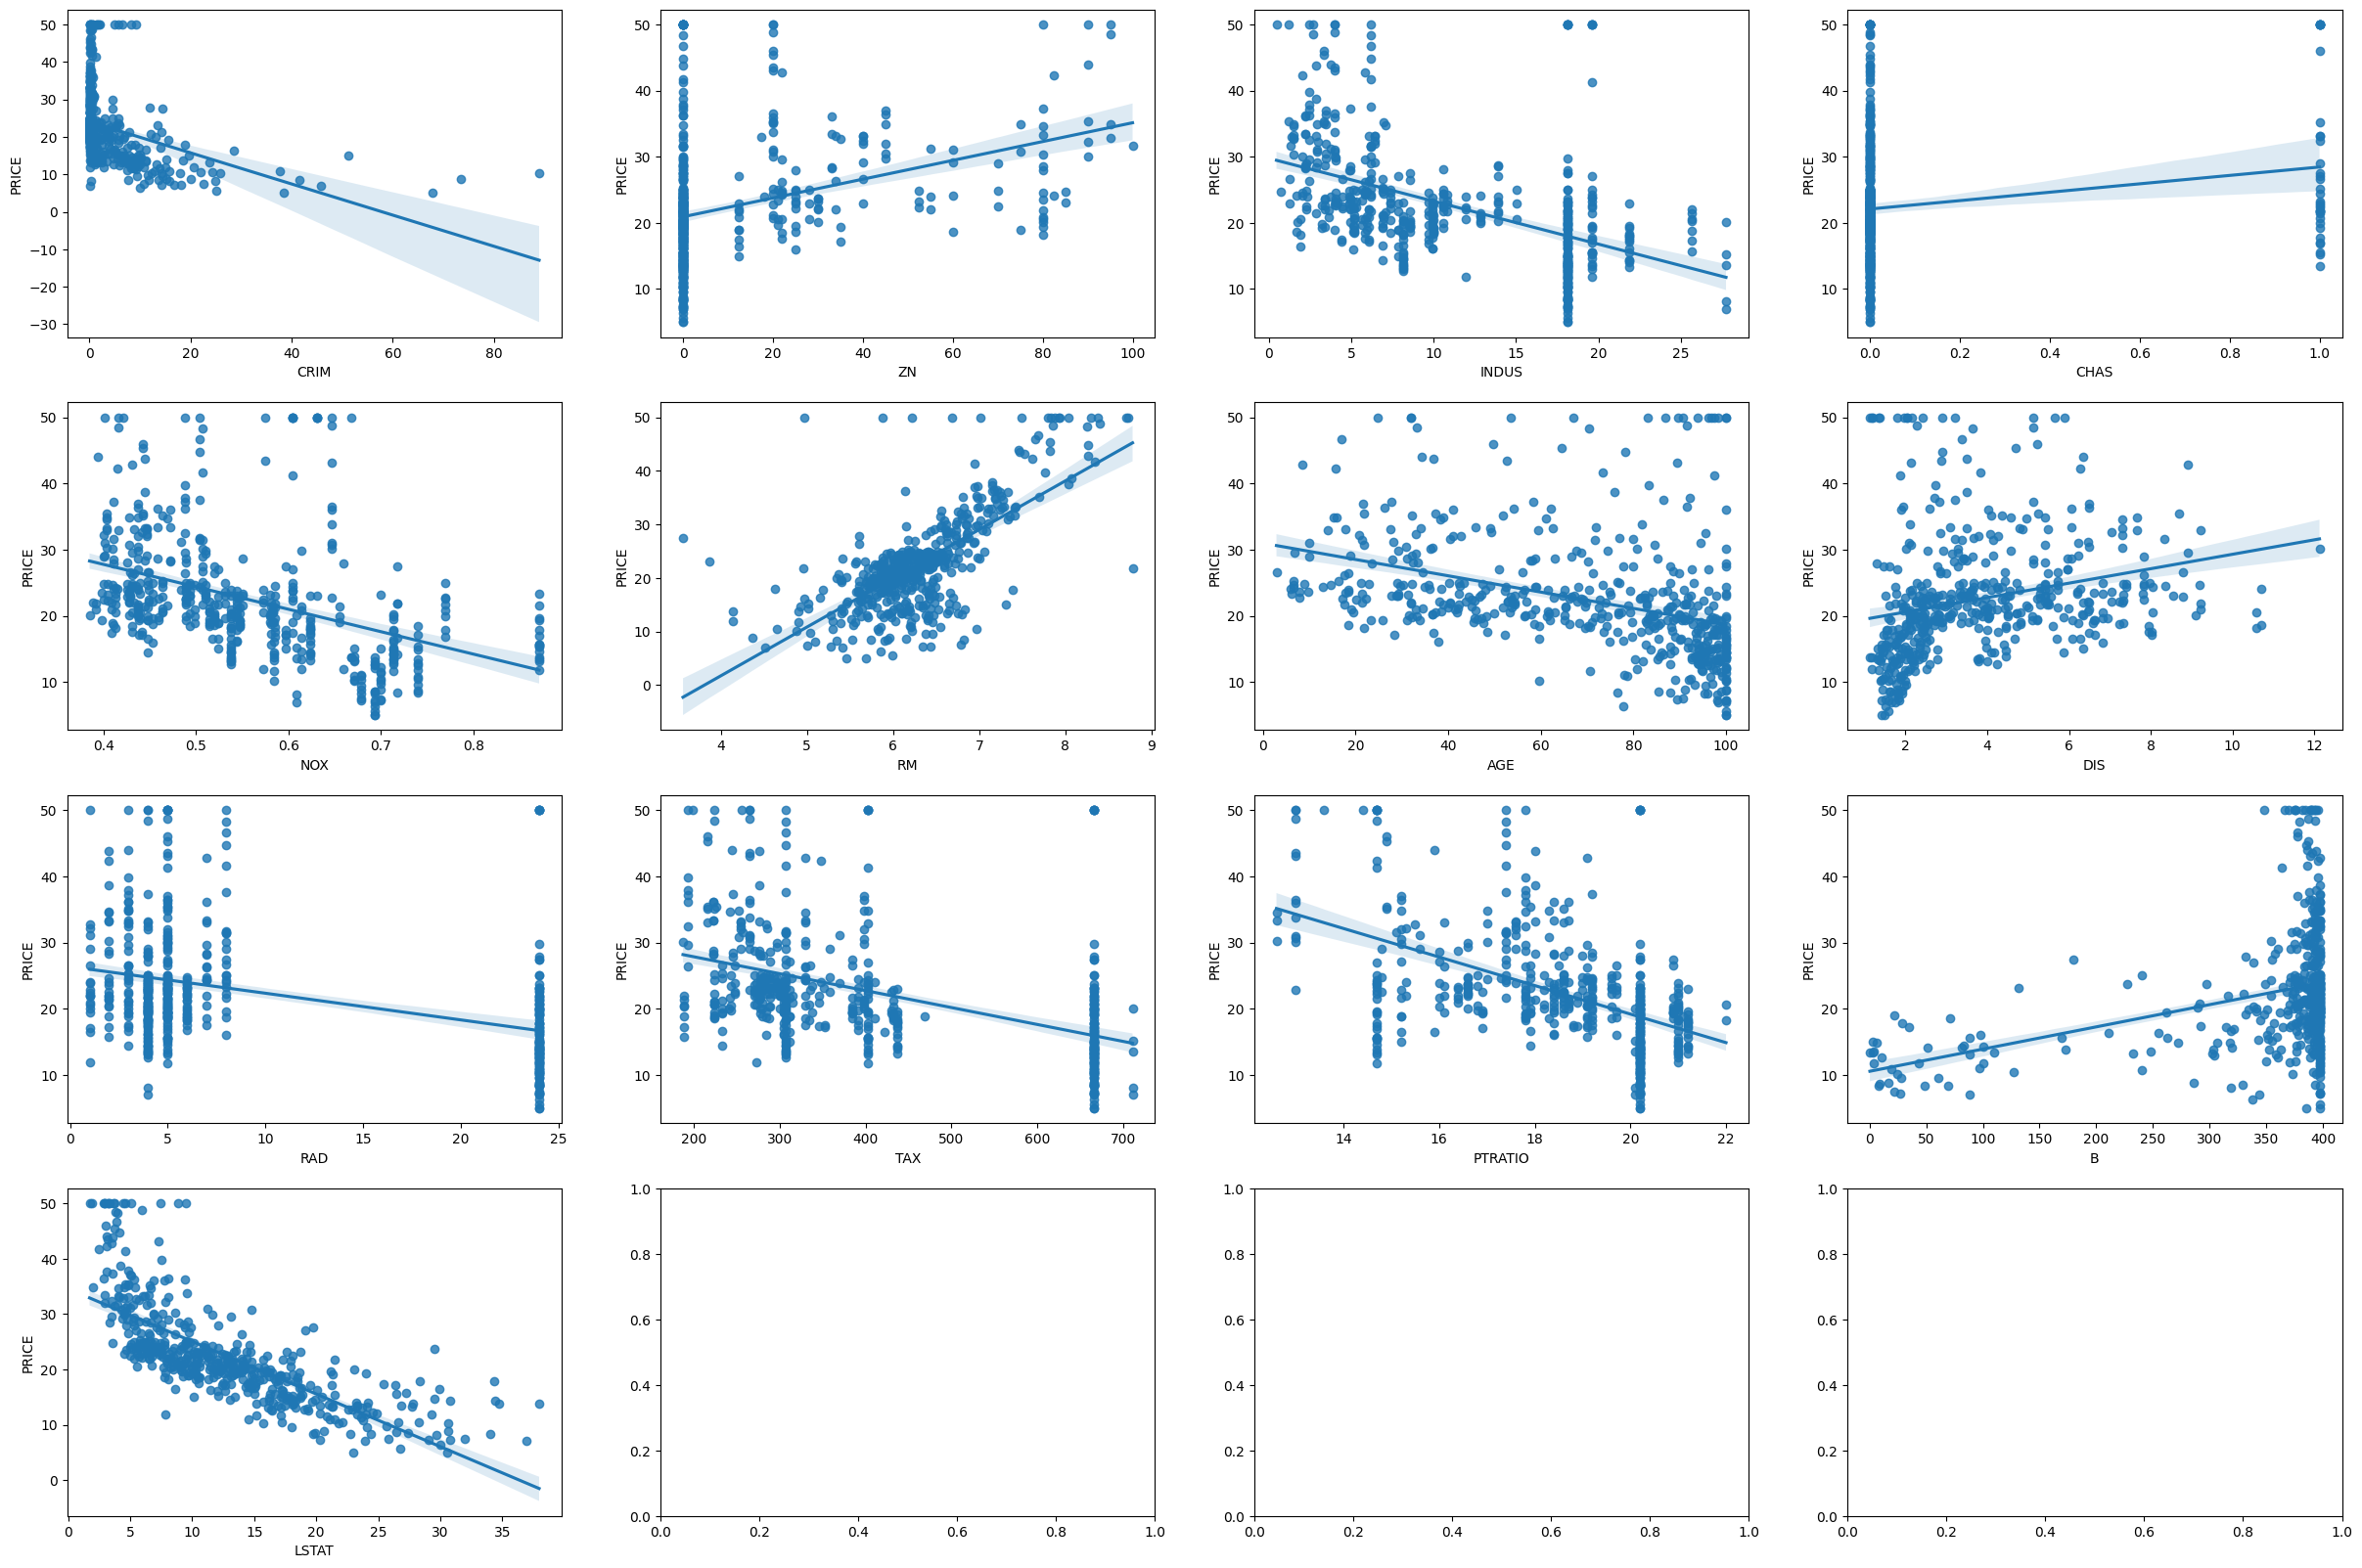

In [133]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y='PRICE',data=df_boston,ax=axs[row][col])


=> RM, LSTAT의 PRICE 영향도가 가장 두드러지게 나타남  
    - RM : Positive Linearity  
    - LSTAT : Negative Linearity  

-----

## PreProcessing

### Feature Scaling

### Train, Test set split

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
y_target = df_boston['PRICE']
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)

위의 산점도 그래프를 통해서
PTRATIO, TAX, RAD, CHAS 는 Regression model 을 만들때 correlation 이 적다고 판단되서 drop 함

In [136]:
x_data = x_data.drop(['PTRATIO','TAX','RAD','CHAS'], axis = 1 , inplace = False)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_target,test_size=0.2,random_state=42)

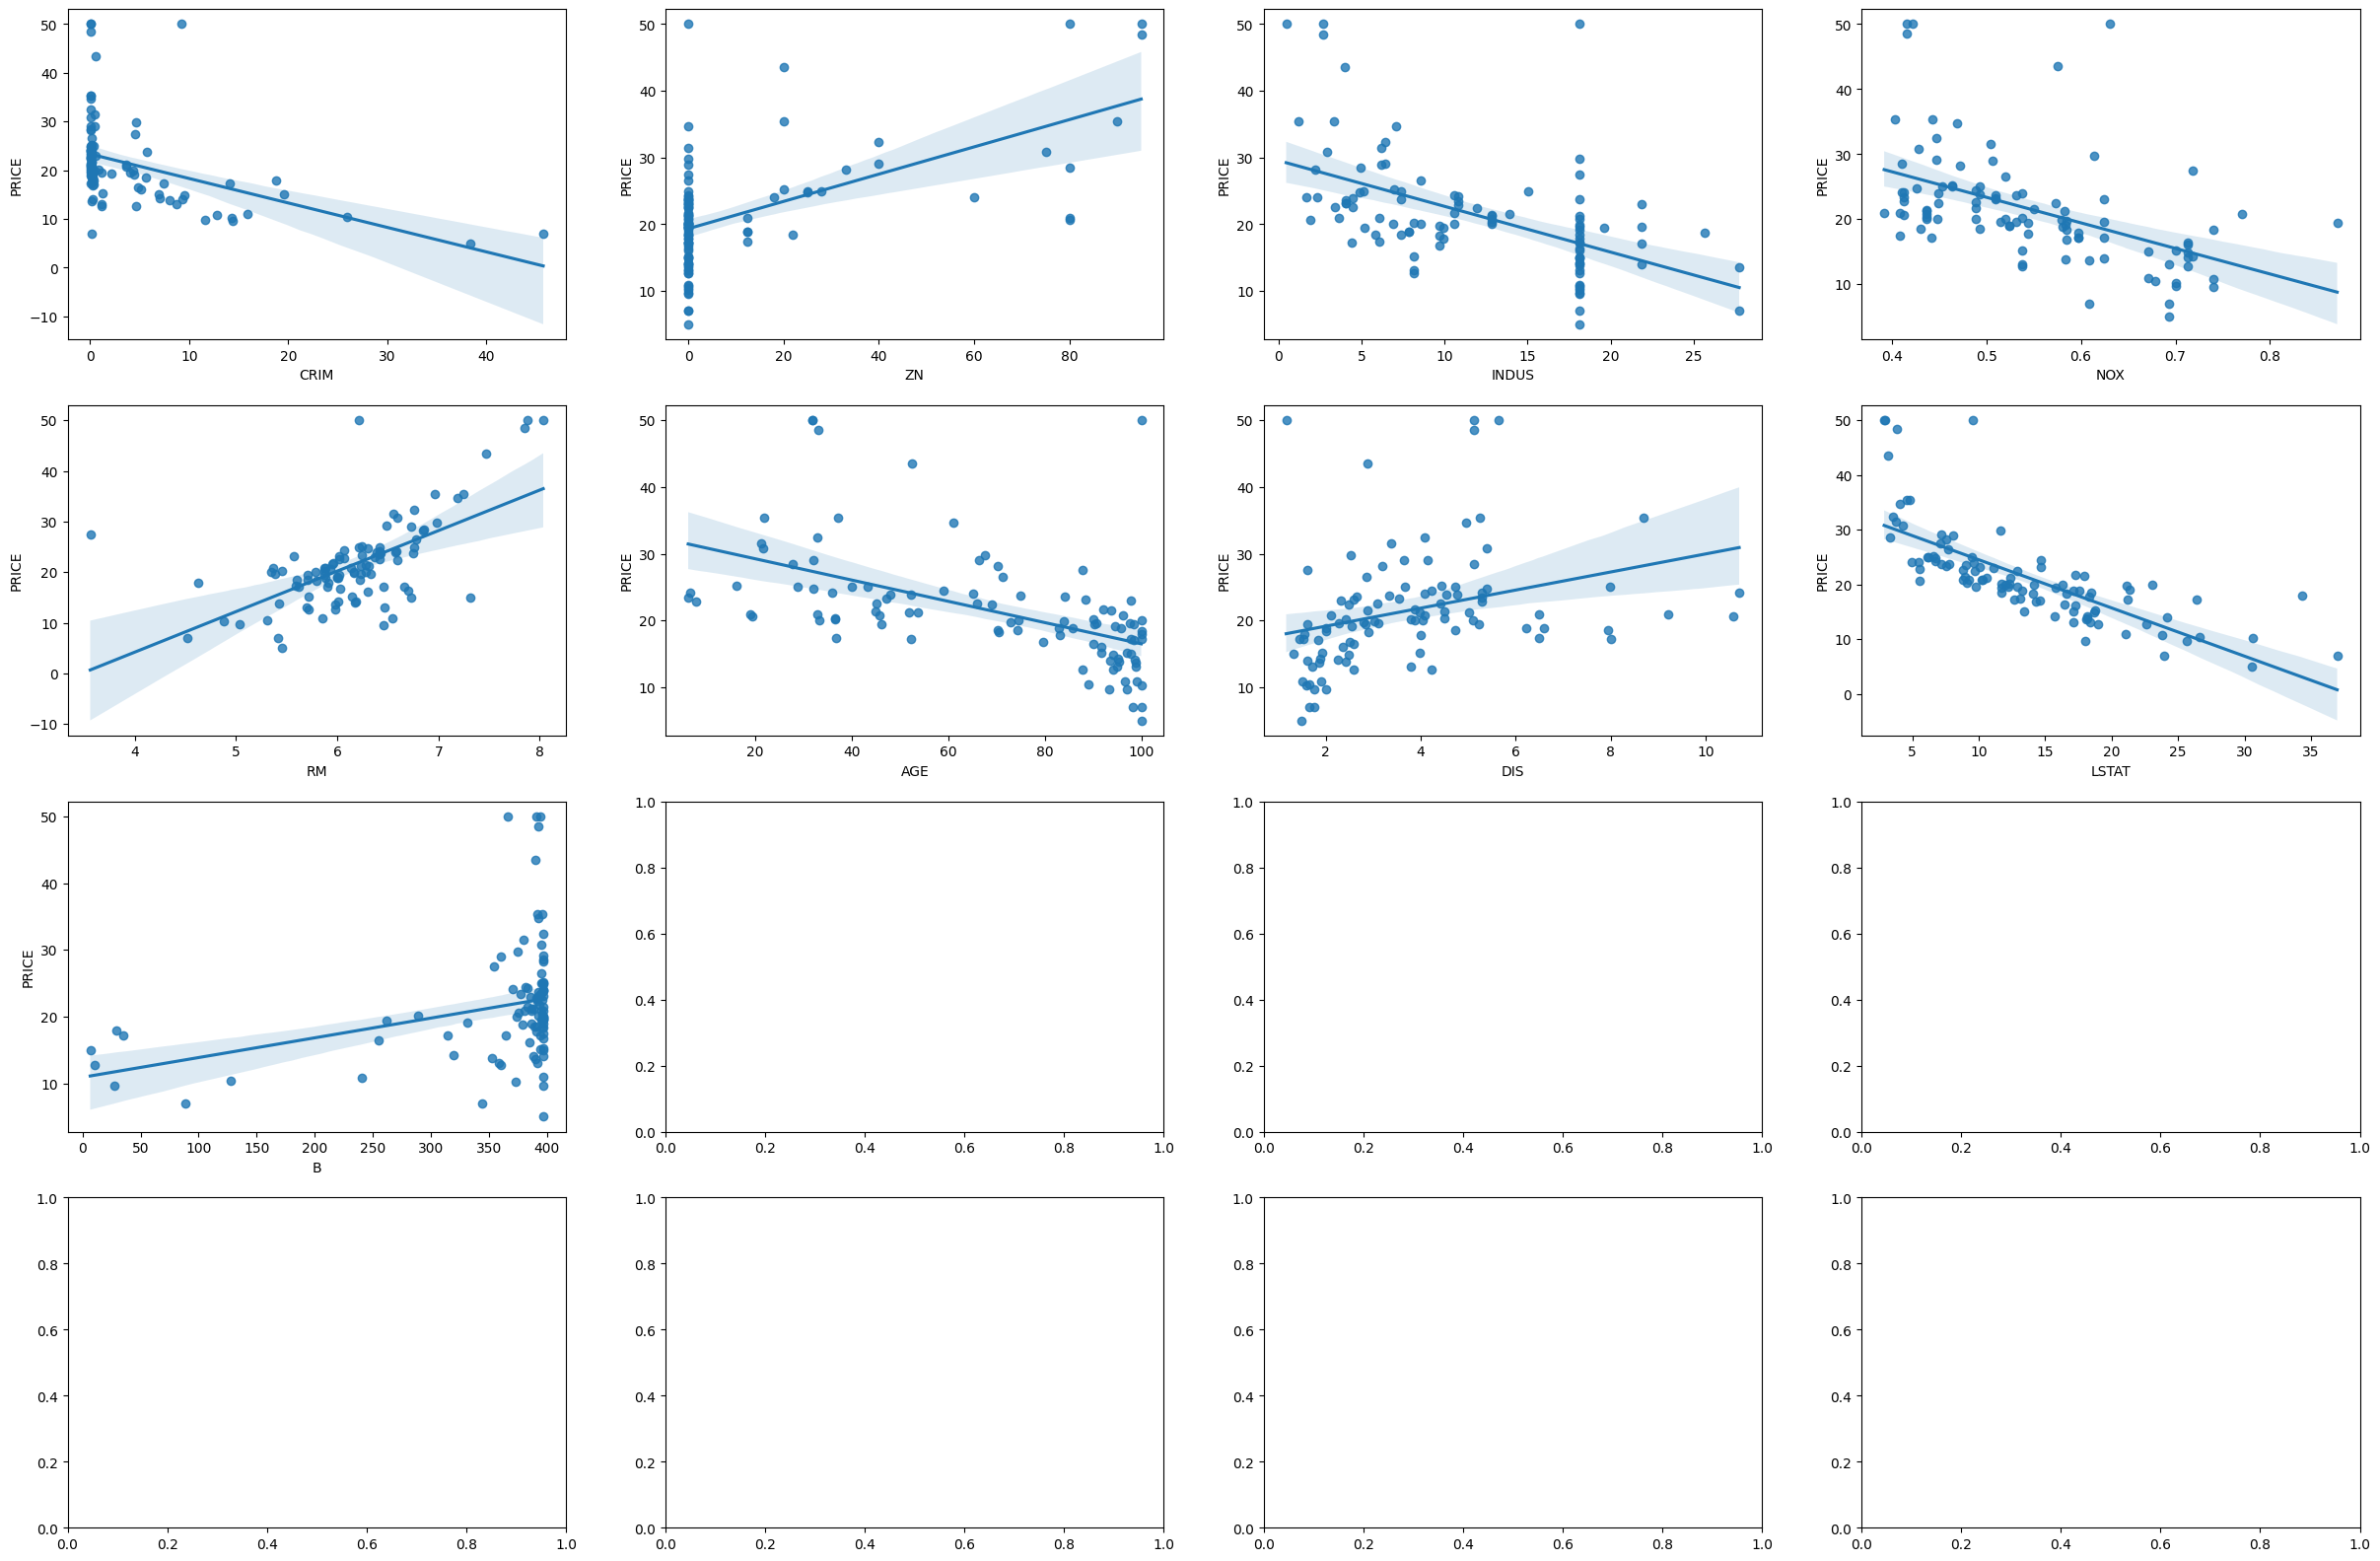

In [138]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','LSTAT','B']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y=y_test,data=x_test,ax=axs[row][col])

-----

## Prediction by Model

### Evaluation Metric : MSE, R2 Score, 5 fold average RMSE

In [139]:
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
def eval_models(answer, model):
    mse = mean_squared_error(answer, model)
    rmse = np.sqrt(mse)

    print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
    print(f'Variance score : {r2_score(answer,model):.3f}')

In [141]:
from sklearn.model_selection import cross_val_score

def cross_val_score_model(model, data, label):
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f'Negative MSE scores : {np.round(neg_mse_scores, 2)}')
    print(f'RMSE scores : {np.round(rmse_scores, 2)}')
    print(f'Avg RMSE : {avg_rmse:.3f}')

### Model : LinearRegression

In [142]:
from sklearn.linear_model import LinearRegression

### Model : Polynomial Regression

In [143]:
from sklearn.preprocessing import PolynomialFeatures

In [145]:
poly_ftr_train = PolynomialFeatures(degree=2).fit_transform(x_train)

poly_lr = LinearRegression()
poly_lr.fit(poly_ftr_train, y_train)


poly_ftr_test = PolynomialFeatures(degree=2).fit_transform(x_test)
poly_lr_preds = poly_lr.predict(poly_ftr_test)

eval_models(y_test, poly_lr_preds)


MSE : 14.193, RMSE : 3.767
Variance score : 0.806


In [121]:
print(f'coefficients : {np.round(poly_lr.coef_)}')

coefficients : [ 1.43515332e+09 -2.00000000e+00 -0.00000000e+00  2.00000000e+00
  7.70000000e+01  7.00000000e+00  0.00000000e+00 -3.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.50000000e+01 -1.10000000e+01
 -0.00000000e+00 -3.00000000e+00  0.00000000e+00  1.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]


In [122]:
print(f'intercept : {poly_lr.intercept_}')
print(f'coefficients : {np.round(poly_lr.coef_,1)}')

# coeff = pd.Series(data=np.round(poly_lr.coef_,1), index=x_data.columns)
# coeff.sort_values(ascending=False)

intercept : -1435153371.4746978
coefficients : [ 1.43515332e+09 -2.40000000e+00 -3.00000000e-01  1.60000000e+00
  7.70000000e+01  6.60000000e+00  3.00000000e-01 -2.70000000e+00
  1.00000000e-01 -4.00000000e-01 -0.00000000e+00  2.00000000e-01
  1.00000000e-01  1.00000000e-01  0.00000000e+00  0.00000000e+00
  2.00000000e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  5.00000000e-01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -3.00000000e-01 -3.00000000e-01  0.00000000e+00  1.00000000e-01
 -0.00000000e+00 -1.00000000e-01 -1.47000000e+01 -1.11000000e+01
 -1.00000000e-01 -3.00000000e+00  0.00000000e+00  7.00000000e-01
  9.00000000e-01 -0.00000000e+00 -2.00000000e-01 -0.00000000e+00
 -1.00000000e-01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.00000000e-01  0.00000000e+00  1.00000000e-01
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]


In [123]:
cross_val_score_model(poly_lr, x_data, y_target)

Negative MSE scores : [-15.77 -26.7  -37.31 -78.08 -32.73]
RMSE scores : [3.97 5.17 6.11 8.84 5.72]
Avg RMSE : 5.961


### Model : Regularized Linear Regression (Ridge, Lasso, Elastic)

Ridge : L2 Regularization

In [29]:
from sklearn.linear_model import Ridge

In [78]:
ridge = Ridge(alpha=70)

cross_val_score_model(ridge, x_data, y_target)

Negative MSE scores : [-16.41 -30.33 -45.72 -52.43 -26.77]
RMSE scores : [4.05 5.51 6.76 7.24 5.17]
Avg RMSE : 5.747


Lasso : L1 Regularization

In [76]:
from sklearn.linear_model import Lasso

In [77]:
lasso = Lasso(alpha=0.05)

cross_val_score_model(lasso, x_data, y_target)

Negative MSE scores : [-15.09 -27.5  -39.74 -68.03 -32.56]
RMSE scores : [3.88 5.24 6.3  8.25 5.71]
Avg RMSE : 5.877


Elastic : L1&L2 Regularization

In [33]:
from sklearn.linear_model import ElasticNet

In [34]:
elas = ElasticNet(alpha=0.05, l1_ratio= 0.01)

cross_val_score_model(elas, x_data, y_target)

Negative MSE scores : [-15.25 -26.88 -39.78 -67.64 -28.39]
RMSE scores : [3.91 5.18 6.31 8.22 5.33]
Avg RMSE : 5.790


In [95]:
ridge.fit(x_train, y_train)

ridge_preds = ridge.predict(x_test)

eval_models(y_test, ridge_preds)

print(f'intercept : {ridge.intercept_}')
print(f'coefficients : {np.round(ridge.coef_,1)}')

ridge_coeff = pd.Series(data=np.round(ridge.coef_,1), index=x_data.columns)
ridge_coeff.sort_values(ascending=False)

MSE : 27.802, RMSE : 5.273
Variance score : 0.621
intercept : 13.813427415156326
coefficients : [-0.1  0.1 -0.2 -0.1  3.2 -0.  -1.4  0.  -0.7]


RM       3.2
ZN       0.1
AGE     -0.0
B        0.0
CRIM    -0.1
NOX     -0.1
INDUS   -0.2
LSTAT   -0.7
DIS     -1.4
dtype: float64

In [96]:
elas.fit(x_train, y_train)

elas_preds = elas.predict(x_test)

eval_models(y_test, elas_preds)

print(f'intercept : {elas.intercept_}')
print(f'coefficients : {np.round(elas.coef_,1)}')

elas_coeff = pd.Series(data=np.round(elas.coef_,1), index=x_data.columns)
elas_coeff.sort_values(ascending=False)

MSE : 28.824, RMSE : 5.369
Variance score : 0.607
intercept : 6.044202039620309
coefficients : [-0.1  0.1 -0.1 -0.5  4.4 -0.  -1.5  0.  -0.6]


RM       4.4
ZN       0.1
AGE     -0.0
B        0.0
CRIM    -0.1
INDUS   -0.1
NOX     -0.5
LSTAT   -0.6
DIS     -1.5
dtype: float64

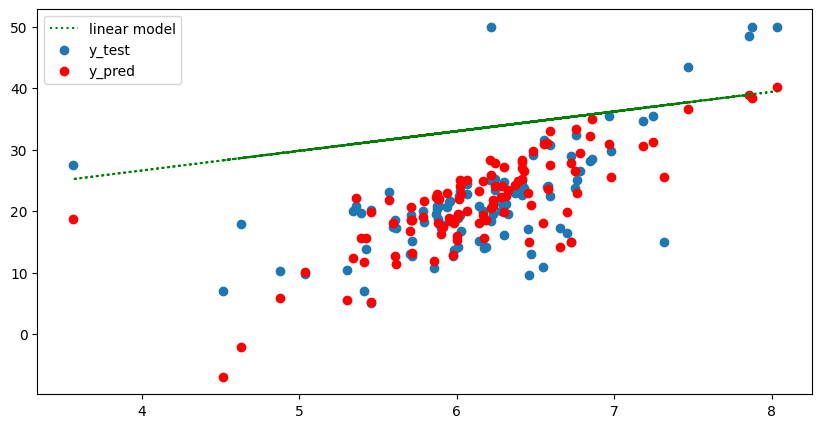

In [100]:
target = 'RM'

plt.figure(figsize=(10,5))
plt.scatter(x_test[target], y_test, label='y_test')
plt.scatter(x_test[target], ridge_preds, c='r', label='y_pred')
plt.plot(x_test[target], ridge_coeff[target]*x_test[target]+ridge.intercept_, 'g:', label='linear model')
plt.legend(loc='best')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [61]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data,y_target, scoring="neg_mean_squared_error", cv = 5) 
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("----", model.__class__.__name__, '----')
    print("5 Fold Cross Validation Avg RMSE: {0:.3f}".format(avg_rmse))

In [70]:
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=1000)
rf_regressor2 = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=2)
rf_regressor3 = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=7)
xgb_regressor = XGBRegressor(random_state=42, n_estimators = 1000, max_depth = 15)
xgb_regressor2 = XGBRegressor(random_state=42, n_estimators = 1000, max_depth= 7)
lgb_regressor = LGBMRegressor(random_state=42, n_estimators= 1000)
lgb_regressor2 = LGBMRegressor(random_state=42, n_estimators= 1000, max_depth=2)
lgb_regressor3 = LGBMRegressor(random_state=42, n_estimators= 1000, max_depth=7)

In [71]:
rf_regressor.fit(x_train, y_train)
rf_regressor2.fit(x_train, y_train)
rf_regressor3.fit(x_train, y_train)
xgb_regressor.fit(x_train, y_train)
xgb_regressor2.fit(x_train, y_train)
lgb_regressor.fit(x_train, y_train)
lgb_regressor2.fit(x_train, y_train)
lgb_regressor3.fit(x_train, y_train)

LGBMRegressor(max_depth=7, n_estimators=1000, random_state=42)

In [72]:
rf_preds = rf_regressor.predict(x_test)
rf_preds2 = rf_regressor2.predict(x_test)
rf_preds3 = rf_regressor3.predict(x_test)
xgb_preds = xgb_regressor.predict(x_test)
xgb_preds2 = xgb_regressor2.predict(x_test)
lgb_preds = lgb_regressor.predict(x_test)
lgb_preds2 = lgb_regressor2.predict(x_test)
lgb_preds3 = lgb_regressor3.predict(x_test)

eval_models(y_test, rf_preds)
eval_models(y_test, rf_preds2)
eval_models(y_test, rf_preds3)
eval_models(y_test, xgb_preds)
eval_models(y_test, xgb_preds2)
eval_models(y_test, lgb_preds)
eval_models(y_test, lgb_preds2)
eval_models(y_test, lgb_preds3)

MSE : 9.236, RMSE : 3.039
Variance score : 0.874
MSE : 21.221, RMSE : 4.607
Variance score : 0.711
MSE : 9.411, RMSE : 3.068
Variance score : 0.872
MSE : 6.143, RMSE : 2.478
Variance score : 0.916
MSE : 5.857, RMSE : 2.420
Variance score : 0.920
MSE : 7.058, RMSE : 2.657
Variance score : 0.904
MSE : 8.366, RMSE : 2.892
Variance score : 0.886
MSE : 7.296, RMSE : 2.701
Variance score : 0.901


In [73]:
models = [rf_regressor, rf_regressor2, rf_regressor3, xgb_regressor,xgb_regressor2, lgb_regressor, lgb_regressor2, lgb_regressor3]
for model in models:
    get_model_cv_prediction(model, x_data, y_target)

---- RandomForestRegressor ----
5 Fold Cross Validation Avg RMSE: 4.660
---- RandomForestRegressor ----
5 Fold Cross Validation Avg RMSE: 5.351
---- RandomForestRegressor ----
5 Fold Cross Validation Avg RMSE: 4.668
---- XGBRegressor ----
5 Fold Cross Validation Avg RMSE: 4.584
---- XGBRegressor ----
5 Fold Cross Validation Avg RMSE: 4.442
---- LGBMRegressor ----
5 Fold Cross Validation Avg RMSE: 4.797
---- LGBMRegressor ----
5 Fold Cross Validation Avg RMSE: 4.998
---- LGBMRegressor ----
5 Fold Cross Validation Avg RMSE: 4.824
